<a href="https://colab.research.google.com/github/liujingiris52-dot/Assignment/blob/main/NS6003_2025_Lab_5_Restricted_Boltzmann_Machine.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# NS6003 Lab 5 Restricted Boltzmann Machine



## Boltzmann Machine

In the lecture, we have discussed a probabilistic extension of the Hopfield model - Boltzmann machine. The probability of activation of an unit is given by
$$
P(s_i = + 1 | \vec{s}_{j \ne i} ) = \frac{1}{1+\exp[-\Delta E_i]},
$$
where $\Delta E_i$ is the *energy difference* between two states of $s_i$.

The *energy function* is given by
$$
E(\vec{s}) = -\sum_{i<j}w_{ij}s_is_j - \sum_ib_is_i,
$$
where $w_{ij}$ is the connection between units $i$ and $j$.

However, since the network is a fully connected network, when we generate outputs from the network, there will be a circular activation. Then the sampling will not be steady. The phenomenon makes Boltzmann machine not applicable.

## Restricted Boltzmann Machine

Restricted Boltzmann machine is proposed To solve the above problem and make the model simpler.

The activation probability will be
$$
P(v_i = + 1 | \vec{v}_{i' \ne i }, \vec{h}_{j}) = \frac{1}{1+\exp[-\Delta E_{v_i}]}, \\
P(h_j = + 1 | \vec{v}_{i }, \vec{h}_{j'\ne j}) = \frac{1}{1+\exp[-\Delta E_{h_j}]},
$$
where $v$ and $h$ are activations of visible nodes and hidden nodes, respectively.

The corresponding energy function is
$$
E(\vec{v}, \vec{h}) = -\sum_{i<j}w_{ij}v_ih_j - \sum_ia_iv_i- \sum_jb_jh_j.
$$
This energy function will be used to calculate the activation probabilities.

### Simple Implementation

#### Initialization

In [ ]:
import numpy as np

# ============================================
# SETUP: Create the RBM structure
# ============================================

# Set the size of our network
n_visible = 6  # Number of input features
n_hidden = 3   # Number of hidden features to learn
learning_rate = 0.1

# Initialize weights and biases with small random values
weights = np.random.randn(n_visible, n_hidden) * 0.01
visible_bias = np.zeros(n_visible)
hidden_bias = np.zeros(n_hidden)

#### Helper Functions

In [ ]:
# ============================================
# HELPER FUNCTIONS
# ============================================

def sigmoid(x):
    """Activation function - squashes values between 0 and 1"""
    return 1 / (1 + np.exp(-x))


def sample_hidden_from_visible(visible_data):
    """
    Given visible layer, calculate and sample hidden layer.
    This is like "encoding" the input.
    """
    # Calculate probability that each hidden unit should be ON (1)
    hidden_prob = sigmoid(np.dot(visible_data, weights) + hidden_bias)

    # Sample: randomly decide if each unit is ON or OFF based on probability
    hidden_sample = (hidden_prob > np.random.rand(n_hidden)).astype(int)

    return hidden_prob, hidden_sample


def sample_visible_from_hidden(hidden_data):
    """
    Given hidden layer, calculate and sample visible layer.
    This is like "decoding" or "reconstructing" the input.
    """
    # Calculate probability that each visible unit should be ON (1)
    visible_prob = sigmoid(np.dot(hidden_data, weights.T) + visible_bias)

    # Sample: randomly decide if each unit is ON or OFF based on probability
    visible_sample = (visible_prob > np.random.rand(n_visible)).astype(int)

    return visible_prob, visible_sample


def reconstruct_data(data):
    """Take data, encode it, then decode it back"""
    h_prob, h_sample = sample_hidden_from_visible(data)
    v_prob, v_sample = sample_visible_from_hidden(h_sample)
    return v_prob

#### Training Data

In [ ]:
# ============================================
# TRAINING DATA
# ============================================

# Create simple binary patterns
training_data = np.array([
    [1, 1, 0, 0, 0, 0],  # Pattern 1: ones on left
    [1, 1, 1, 0, 0, 0],  # Pattern 2: ones on left
    [0, 0, 0, 1, 1, 0],  # Pattern 3: ones on right
    [0, 0, 0, 1, 1, 1],  # Pattern 4: ones on right
])

print("Training data:")
print(training_data)
print()

Training data:
[[1 1 0 0 0 0]
 [1 1 1 0 0 0]
 [0 0 0 1 1 0]
 [0 0 0 1 1 1]]



#### Training Loop

In [ ]:
# ============================================
# TRAINING LOOP
# ============================================

epochs = 100  # How many times to go through all data

for epoch in range(epochs):

    # Go through each training sample
    for sample in training_data:

        # POSITIVE PHASE: Encode the real data
        h_prob_positive, h_sample_positive = sample_hidden_from_visible(sample)

        # NEGATIVE PHASE: Decode back to reconstruct
        v_prob_negative, v_sample_negative = sample_visible_from_hidden(h_sample_positive)

        # Encode the reconstruction
        h_prob_negative, h_sample_negative = sample_hidden_from_visible(v_prob_negative)

        # UPDATE WEIGHTS AND BIASES
        # The idea: strengthen connections that match real data,
        # weaken connections that match reconstructed data
        weights += learning_rate * (
            np.outer(sample, h_prob_positive) - np.outer(v_prob_negative, h_prob_negative)
        )
        visible_bias += learning_rate * (sample - v_prob_negative)
        hidden_bias += learning_rate * (h_prob_positive - h_prob_negative)

    # Print progress every 10 epochs
    if (epoch + 1) % 10 == 0:
        # Calculate how different the reconstructions are from originals
        reconstructed = reconstruct_data(training_data)
        error = np.mean((training_data - reconstructed)**2)
        print(f"Epoch {epoch + 1}, Reconstruction error: {error:.4f}")

Epoch 10, Reconstruction error: 0.2307
Epoch 20, Reconstruction error: 0.2295
Epoch 30, Reconstruction error: 0.2274
Epoch 40, Reconstruction error: 0.2318
Epoch 50, Reconstruction error: 0.1400
Epoch 60, Reconstruction error: 0.0923
Epoch 70, Reconstruction error: 0.0710
Epoch 80, Reconstruction error: 0.0655
Epoch 90, Reconstruction error: 0.0531
Epoch 100, Reconstruction error: 0.0477


#### Testing (Reconstruct the Data)

In [ ]:

# ============================================
# TEST THE RESULTS
# ============================================

print("\nOriginal data:")
print(training_data)

print("\nReconstructed data:")
reconstructed = reconstruct_data(training_data)
print(np.round(reconstructed, 2))


Original data:
[[1 1 0 0 0 0]
 [1 1 1 0 0 0]
 [0 0 0 1 1 0]
 [0 0 0 1 1 1]]

Reconstructed data:
[[0.96 0.96 0.52 0.03 0.03 0.01]
 [0.96 0.96 0.52 0.03 0.03 0.01]
 [0.14 0.14 0.13 0.88 0.88 0.5 ]
 [0.14 0.14 0.13 0.88 0.88 0.5 ]]


### Implementation in Scikit-learn

#### Initialization

In [ ]:
import numpy as np
from sklearn.neural_network import BernoulliRBM
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt

#### Loading the data

Dataset shape: (1797, 64)
Number of samples: 1797
Number of features (pixels): 64



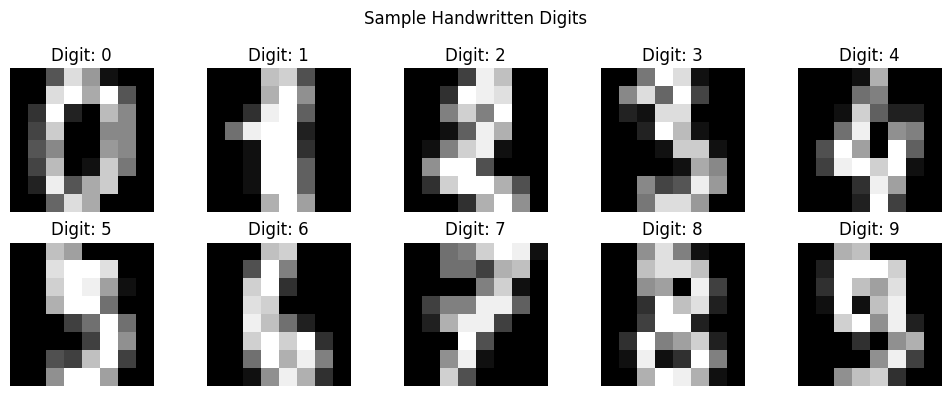

In [ ]:
# ============================================
# LOAD REAL DATA: Handwritten Digits
# ============================================

# Load the digits dataset (images of handwritten numbers 0-9)
digits = load_digits()
X = digits.data  # Each row is an 8x8 image flattened to 64 pixels
y = digits.target  # The actual digit (0-9)

# Normalize pixel values to be between 0 and 1
X = X / 16.0

print(f"Dataset shape: {X.shape}")
print(f"Number of samples: {X.shape[0]}")
print(f"Number of features (pixels): {X.shape[1]}")
print()

# Show a few example digits
fig, axes = plt.subplots(2, 5, figsize=(10, 4))
for i, ax in enumerate(axes.flat):
    ax.imshow(X[i].reshape(8, 8), cmap='gray')
    ax.set_title(f"Digit: {y[i]}")
    ax.axis('off')
plt.suptitle("Sample Handwritten Digits")
plt.tight_layout()

#### Create the RBM Object

In [ ]:
# ============================================
# CREATE AND TRAIN THE RBM
# ============================================

# Create the RBM
rbm = BernoulliRBM(
    n_components=64,      # Number of hidden units (features to learn)
    learning_rate=0.01,   # How fast to learn
    n_iter=20,            # Number of training iterations
    random_state=42,      # For reproducible results
    verbose=True          # Show progress during training
)

print("Training the RBM...")
print("-" * 50)
rbm.fit(X)
print("-" * 50)
print("Training complete!\n")

Training the RBM...
--------------------------------------------------
[BernoulliRBM] Iteration 1, pseudo-likelihood = -25.37, time = 0.04s
[BernoulliRBM] Iteration 2, pseudo-likelihood = -25.02, time = 0.07s
[BernoulliRBM] Iteration 3, pseudo-likelihood = -25.19, time = 0.07s
[BernoulliRBM] Iteration 4, pseudo-likelihood = -24.97, time = 0.07s
[BernoulliRBM] Iteration 5, pseudo-likelihood = -24.84, time = 0.07s
[BernoulliRBM] Iteration 6, pseudo-likelihood = -24.93, time = 0.08s
[BernoulliRBM] Iteration 7, pseudo-likelihood = -24.87, time = 0.08s
[BernoulliRBM] Iteration 8, pseudo-likelihood = -24.86, time = 0.08s
[BernoulliRBM] Iteration 9, pseudo-likelihood = -24.81, time = 0.08s
[BernoulliRBM] Iteration 10, pseudo-likelihood = -24.84, time = 0.08s
[BernoulliRBM] Iteration 11, pseudo-likelihood = -24.92, time = 0.07s
[BernoulliRBM] Iteration 12, pseudo-likelihood = -24.79, time = 0.07s
[BernoulliRBM] Iteration 13, pseudo-likelihood = -24.72, time = 0.09s
[BernoulliRBM] Iteration 14,

#### Visual the features detected by hidden units

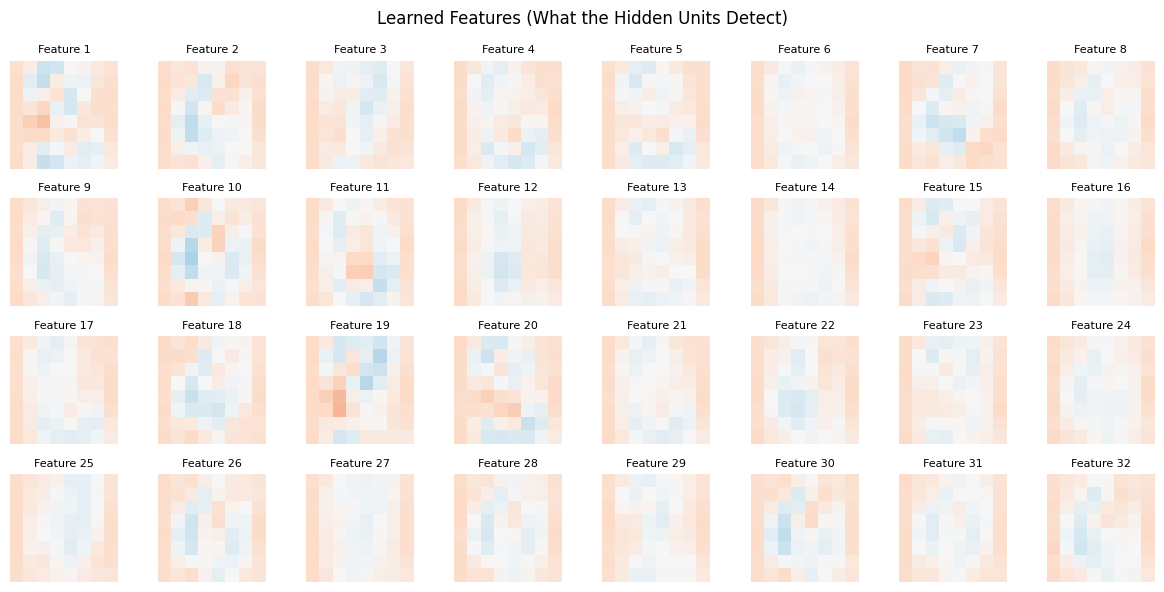

In [ ]:
# The weights show what features the RBM learned
# Each hidden unit learns to detect a different pattern
components = rbm.components_

fig, axes = plt.subplots(4, 8, figsize=(12, 6))
for i, ax in enumerate(axes.flat):
    if i < len(components):
        # Reshape and display each learned feature
        ax.imshow(components[i].reshape(8, 8), cmap='RdBu',
                  vmin=-1, vmax=1)
        ax.set_title(f"Feature {i+1}", fontsize=8)
    ax.axis('off')
plt.suptitle("Learned Features (What the Hidden Units Detect)")
plt.tight_layout()

#### Testing (Reconstruct the Data)

Each digit is now represented by 64 learned features



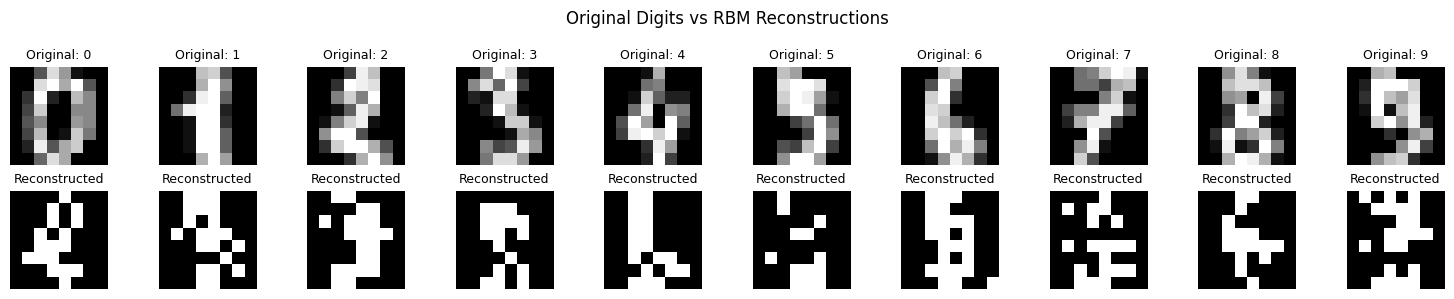

In [ ]:
# ============================================
# TEST RECONSTRUCTION
# ============================================

# Take some test samples and reconstruct them
n_test = 10
test_samples = X[:n_test]
test_labels = y[:n_test]

# Perform one set of gibbs sampling

reconstructed = rbm.gibbs(test_samples)

for _ in range(10):
  reconstructed = rbm.gibbs(reconstructed)

print(f"Each digit is now represented by {rbm.n_components} learned features\n")

# Visualize original vs reconstructed
fig, axes = plt.subplots(2, n_test, figsize=(15, 3))

for i in range(n_test):
    # Original
    axes[0, i].imshow(test_samples[i].reshape(8, 8), cmap='gray')
    axes[0, i].set_title(f"Original: {test_labels[i]}", fontsize=9)
    axes[0, i].axis('off')

    # Reconstructed
    axes[1, i].imshow(reconstructed[i].reshape(8, 8), cmap='gray')
    axes[1, i].set_title("Reconstructed", fontsize=9)
    axes[1, i].axis('off')

plt.suptitle("Original Digits vs RBM Reconstructions")
plt.tight_layout()

#### Show Reconstruction Error

Average reconstruction error: 0.2153
Min reconstruction error: 0.0756
Max reconstruction error: 0.3701


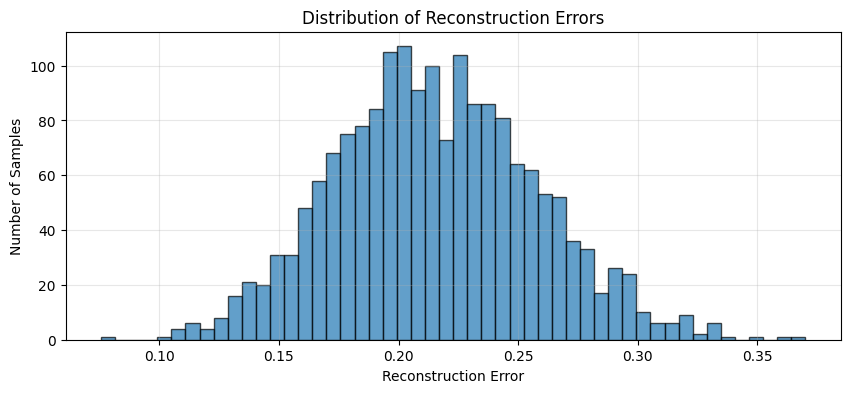

In [ ]:
# ============================================
# SHOW RECONSTRUCTION ERROR
# ============================================

# Calculate reconstruction error for all data
#all_hidden = rbm.transform(X)
all_reconstructed = rbm.gibbs(X)

for _ in range(10):
  all_reconstructed = rbm.gibbs(all_reconstructed)

reconstruction_error = np.mean((X - all_reconstructed)**2, axis=1)

print(f"Average reconstruction error: {np.mean(reconstruction_error):.4f}")
print(f"Min reconstruction error: {np.min(reconstruction_error):.4f}")
print(f"Max reconstruction error: {np.max(reconstruction_error):.4f}")

# Plot histogram of errors
plt.figure(figsize=(10, 4))
plt.hist(reconstruction_error, bins=50, edgecolor='black', alpha=0.7)
plt.xlabel('Reconstruction Error')
plt.ylabel('Number of Samples')
plt.title('Distribution of Reconstruction Errors')
plt.grid(True, alpha=0.3)

#### Generate New Pattern


Generating new digit-like samples from the RBM...


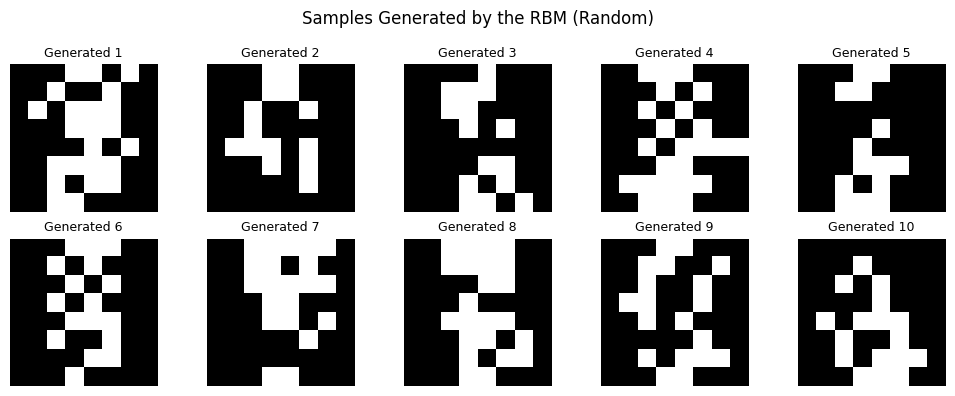

In [ ]:
# ============================================
# GENERATE NEW SAMPLES (Optional: Advanced)
# ============================================

print("\n" + "="*50)
print("Generating new digit-like samples from the RBM...")
print("="*50)

# Start with random hidden states
n_samples = 10
random_hidden = np.random.binomial(1, 0.5, size=(n_samples, rbm.n_features_in_))

# Generate visible units from random hidden states
generated = rbm.gibbs(random_hidden)

for _ in range(20):
  generated = rbm.gibbs(generated)

# Visualize generated samples
fig, axes = plt.subplots(2, 5, figsize=(10, 4))
for i, ax in enumerate(axes.flat):
    ax.imshow(generated[i].reshape(8, 8), cmap='gray')
    ax.set_title(f"Generated {i+1}", fontsize=9)
    ax.axis('off')
plt.suptitle("Samples Generated by the RBM (Random)")
plt.tight_layout()

### Using RBM for Classification

In [ ]:
import numpy as np
from sklearn.neural_network import BernoulliRBM
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# ============================================
# LOAD AND PREPARE DATA
# ============================================

# Load the digits dataset
digits = load_digits()
X = digits.data / 16.0  # Normalize to [0, 1]
y = digits.target

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print(f"Training samples: {X_train.shape[0]}")
print(f"Test samples: {X_test.shape[0]}")
print(f"Number of classes: {len(np.unique(y))}")
print()

Training samples: 1437
Test samples: 360
Number of classes: 10



In [ ]:
# ============================================
# METHOD 1: RBM + Logistic Regression Pipeline
# ============================================

print("="*60)
print("METHOD 1: RBM as Feature Extractor + Logistic Regression")
print("="*60)

# Create a pipeline: RBM extracts features, then LogisticRegression classifies
rbm_classifier = Pipeline([
    ('rbm', BernoulliRBM(
        n_components=128,     # Number of features to extract
        learning_rate=0.01,
        n_iter=20,
        random_state=42,
        verbose=True
    )),
    ('logistic', LogisticRegression(
        max_iter=1000,
        random_state=42
    ))
])

print("\nTraining RBM + Classifier...")
print("-" * 60)
rbm_classifier.fit(X_train, y_train)
print("-" * 60)

# Make predictions
y_pred_rbm = rbm_classifier.predict(X_test)
accuracy_rbm = accuracy_score(y_test, y_pred_rbm)

print(f"\nAccuracy with RBM features: {accuracy_rbm:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_rbm))

METHOD 1: RBM as Feature Extractor + Logistic Regression

Training RBM + Classifier...
------------------------------------------------------------
[BernoulliRBM] Iteration 1, pseudo-likelihood = -25.67, time = 0.05s
[BernoulliRBM] Iteration 2, pseudo-likelihood = -25.68, time = 0.10s
[BernoulliRBM] Iteration 3, pseudo-likelihood = -25.36, time = 0.10s
[BernoulliRBM] Iteration 4, pseudo-likelihood = -25.51, time = 0.09s
[BernoulliRBM] Iteration 5, pseudo-likelihood = -25.27, time = 0.09s
[BernoulliRBM] Iteration 6, pseudo-likelihood = -25.35, time = 0.09s
[BernoulliRBM] Iteration 7, pseudo-likelihood = -25.36, time = 0.09s
[BernoulliRBM] Iteration 8, pseudo-likelihood = -25.28, time = 0.09s
[BernoulliRBM] Iteration 9, pseudo-likelihood = -25.19, time = 0.09s
[BernoulliRBM] Iteration 10, pseudo-likelihood = -25.16, time = 0.09s
[BernoulliRBM] Iteration 11, pseudo-likelihood = -25.14, time = 0.09s
[BernoulliRBM] Iteration 12, pseudo-likelihood = -25.10, time = 0.10s
[BernoulliRBM] Iterat

In [ ]:
# ============================================
# METHOD 2: Just Logistic Regression (Baseline)
# ============================================

print("\n" + "="*60)
print("METHOD 2: Logistic Regression Only (Baseline)")
print("="*60)

# Train a simple logistic regression without RBM for comparison
baseline_classifier = LogisticRegression(max_iter=1000, random_state=42)
baseline_classifier.fit(X_train, y_train)

y_pred_baseline = baseline_classifier.predict(X_test)
accuracy_baseline = accuracy_score(y_test, y_pred_baseline)

print(f"\nAccuracy without RBM: {accuracy_baseline:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_baseline))


METHOD 2: Logistic Regression Only (Baseline)

Accuracy without RBM: 0.9667

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        33
           1       0.96      0.96      0.96        28
           2       0.97      1.00      0.99        33
           3       1.00      0.97      0.99        34
           4       1.00      0.98      0.99        46
           5       0.91      0.91      0.91        47
           6       0.97      0.97      0.97        35
           7       1.00      0.97      0.99        34
           8       0.97      0.97      0.97        30
           9       0.90      0.95      0.93        40

    accuracy                           0.97       360
   macro avg       0.97      0.97      0.97       360
weighted avg       0.97      0.97      0.97       360



In [ ]:

# ============================================
# COMPARE RESULTS
# ============================================

print("\n" + "="*60)
print("COMPARISON")
print("="*60)
print(f"RBM + Logistic Regression:  {accuracy_rbm:.4f}")
print(f"Logistic Regression only:   {accuracy_baseline:.4f}")
print(f"Improvement: {(accuracy_rbm - accuracy_baseline):.4f}")


COMPARISON
RBM + Logistic Regression:  0.7917
Logistic Regression only:   0.9667
Improvement: -0.1750


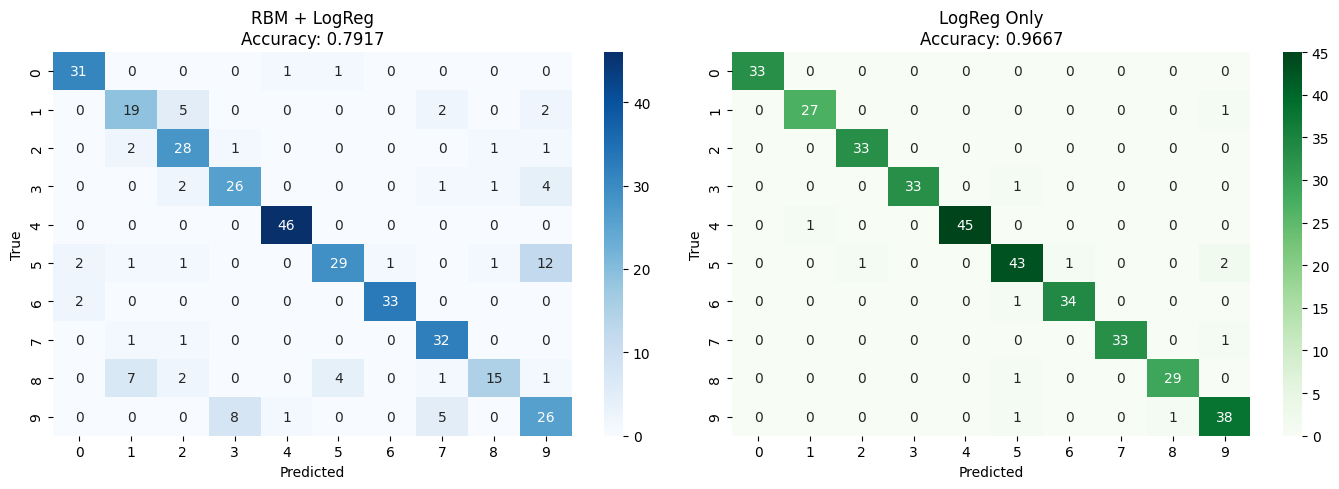

In [ ]:
# ============================================
# VISUALIZE CONFUSION MATRIX
# ============================================

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Confusion matrix for RBM classifier
cm_rbm = confusion_matrix(y_test, y_pred_rbm)
sns.heatmap(cm_rbm, annot=True, fmt='d', cmap='Blues', ax=axes[0])
axes[0].set_title(f'RBM + LogReg\nAccuracy: {accuracy_rbm:.4f}')
axes[0].set_xlabel('Predicted')
axes[0].set_ylabel('True')

# Confusion matrix for baseline
cm_baseline = confusion_matrix(y_test, y_pred_baseline)
sns.heatmap(cm_baseline, annot=True, fmt='d', cmap='Greens', ax=axes[1])
axes[1].set_title(f'LogReg Only\nAccuracy: {accuracy_baseline:.4f}')
axes[1].set_xlabel('Predicted')
axes[1].set_ylabel('True')

plt.tight_layout()

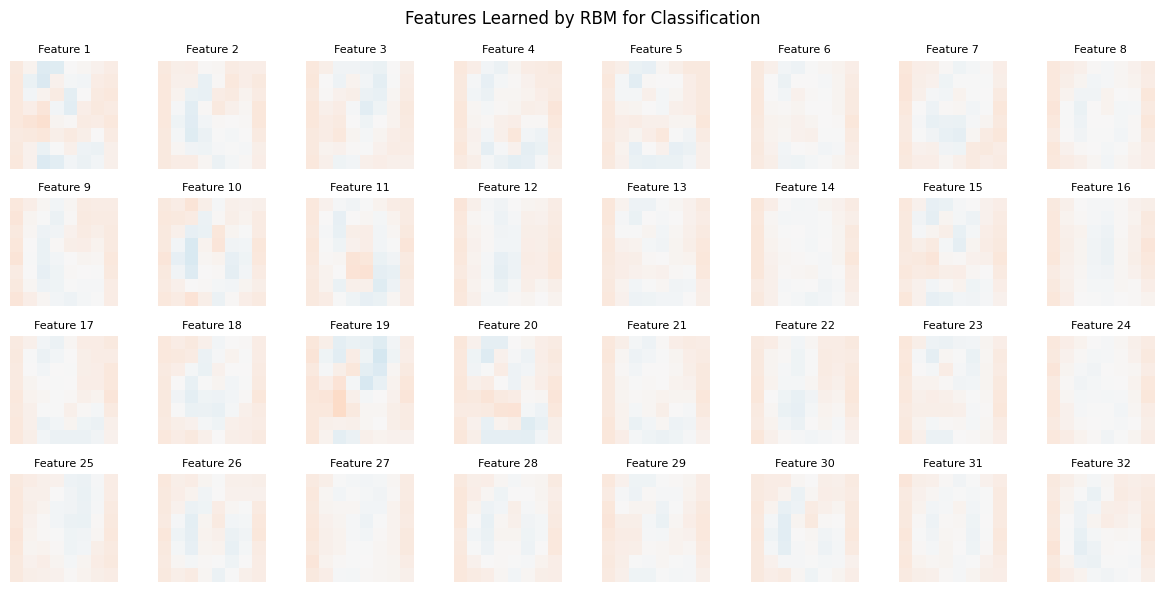

In [ ]:
# ============================================
# VISUALIZE LEARNED FEATURES FOR CLASSIFICATION
# ============================================

# Extract the RBM from the pipeline
rbm = rbm_classifier.named_steps['rbm']

# Show what features the RBM learned
components = rbm.components_

fig, axes = plt.subplots(4, 8, figsize=(12, 6))
for i, ax in enumerate(axes.flat):
    if i < len(components):
        ax.imshow(components[i].reshape(8, 8), cmap='RdBu',
                  vmin=-1, vmax=1)
        ax.set_title(f"Feature {i+1}", fontsize=8)
    ax.axis('off')
plt.suptitle("Features Learned by RBM for Classification")
plt.tight_layout()


FEATURE TRANSFORMATION EXAMPLE
Original features: 64 (64 pixels)
RBM features: 128 (learned features)



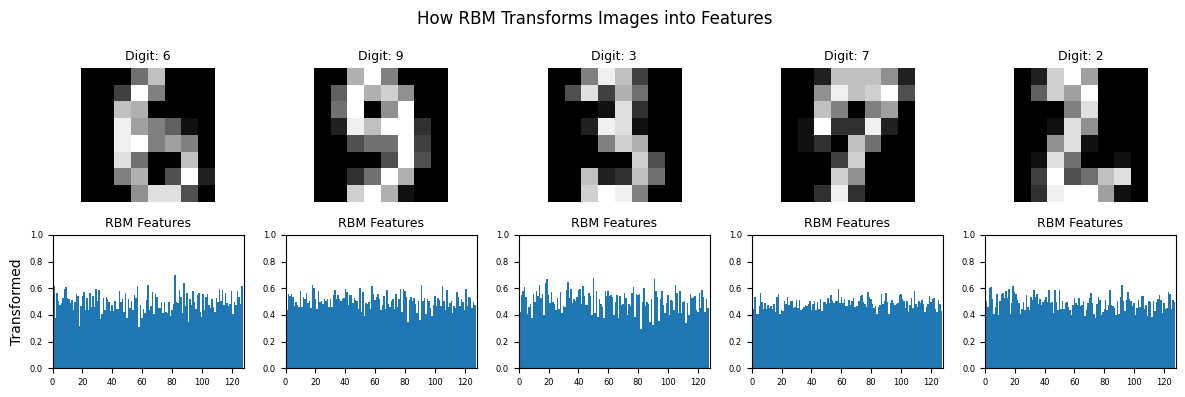

In [ ]:

# ============================================
# SHOW FEATURE TRANSFORMATION
# ============================================

# Take some examples and show how RBM transforms them
n_examples = 5
example_indices = [0, 1, 2, 3, 4]
examples = X_test[example_indices]
true_labels = y_test[example_indices]

# Transform using RBM
rbm_features = rbm.transform(examples)

print("\n" + "="*60)
print("FEATURE TRANSFORMATION EXAMPLE")
print("="*60)
print(f"Original features: {examples.shape[1]} (64 pixels)")
print(f"RBM features: {rbm_features.shape[1]} (learned features)")
print()

# Show the transformed features
fig, axes = plt.subplots(2, n_examples, figsize=(12, 4))

for i in range(n_examples):
    # Original image
    axes[0, i].imshow(examples[i].reshape(8, 8), cmap='gray')
    axes[0, i].set_title(f"Digit: {true_labels[i]}", fontsize=9)
    axes[0, i].axis('off')

    # RBM features (as a bar plot)
    axes[1, i].bar(range(len(rbm_features[i])), rbm_features[i], width=1.0)
    axes[1, i].set_title("RBM Features", fontsize=9)
    axes[1, i].set_ylim([0, 1])
    axes[1, i].set_xlim([0, len(rbm_features[i])])
    axes[1, i].tick_params(labelsize=6)

axes[0, 0].set_ylabel("Original", fontsize=10)
axes[1, 0].set_ylabel("Transformed", fontsize=10)

plt.suptitle("How RBM Transforms Images into Features")
plt.tight_layout()

In [ ]:
# ============================================
# TEST ON INDIVIDUAL SAMPLES
# ============================================

print("\n" + "="*60)
print("TESTING ON INDIVIDUAL SAMPLES")
print("="*60)

for i in range(5):
    sample = X_test[i:i+1]
    true_label = y_test[i]

    # Predict with RBM classifier
    pred_rbm = rbm_classifier.predict(sample)[0]

    # Predict with baseline
    pred_baseline = baseline_classifier.predict(sample)[0]

    print(f"\nSample {i+1}:")
    print(f"  True label:     {true_label}")
    print(f"  RBM prediction: {pred_rbm} {'✓' if pred_rbm == true_label else '✗'}")
    print(f"  Baseline pred:  {pred_baseline} {'✓' if pred_baseline == true_label else '✗'}")




TESTING ON INDIVIDUAL SAMPLES

Sample 1:
  True label:     6
  RBM prediction: 6 ✓
  Baseline pred:  6 ✓

Sample 2:
  True label:     9
  RBM prediction: 9 ✓
  Baseline pred:  9 ✓

Sample 3:
  True label:     3
  RBM prediction: 3 ✓
  Baseline pred:  3 ✓

Sample 4:
  True label:     7
  RBM prediction: 7 ✓
  Baseline pred:  7 ✓

Sample 5:
  True label:     2
  RBM prediction: 2 ✓
  Baseline pred:  2 ✓


## Assignment

By the above example, we have combined two models, RBM and logistric regression, to make a classifier. However, how the accuracy depends on the number of hidden units in the RBM is still unknown here.

**Task:** Using the code in the above example**s**, try to figure out the relation between accuracy and the number of hidden units in RBM. You should generate an output similar to the following:




```
Training samples: 1437
Test samples: 360
Number of classes: 10

h_size	Accuracy
============================================================
2	0.0806
4	0.0889
8	0.2278
16	0.5889
32	0.7028
64	0.7583
128	0.7917
256	0.8083
512	0.8306
1024	0.8444
```





In [ ]:
# Your Code Here!